In [1]:
print("hello World")

hello World


Separar a vírgula do arquivo

In [2]:
# Abrindo o arquivo

from tabulate import tabulate

file = open('arquivo.csv', 'r')

# Lendo todas as linhas do arquivo
lines = file.readlines()

# Fechando o arquivo
file.close()

# Removendo a primeira linha (que contém a configuração sep=,)
lines = lines[1:]

# Criando listas para armazenar os dados separados
timestamps = []
porcentagens = []

# Iterando sobre cada linha e separando os dados
for line in lines:
    parts = line.strip().split(',')
    timestamps.append(parts[0])
    porcentagens.append(parts[1])

# Imprimindo os resultados para verificar
data = list(zip(timestamps, porcentagens))
print(tabulate(data, headers=["Timestamp", "Porcentagem"], tablefmt="grid"))



+---------------------+---------------------------------------+
| Timestamp           | Porcentagem                           |
+=====================+=======================================+
| "Time"              | "porcentagem {location=""local_test"" |
+---------------------+---------------------------------------+
| 2024-03-06 12:30:00 | 100                                   |
+---------------------+---------------------------------------+
| 2024-03-06 12:35:00 | 100                                   |
+---------------------+---------------------------------------+
| 2024-03-06 12:45:00 | 100                                   |
+---------------------+---------------------------------------+
| 2024-03-06 12:50:00 | 100                                   |
+---------------------+---------------------------------------+
| 2024-03-06 12:55:00 | 100                                   |
+---------------------+---------------------------------------+
| 2024-03-06 13:00:00 | 100             

Primeiro prinnt da tabela

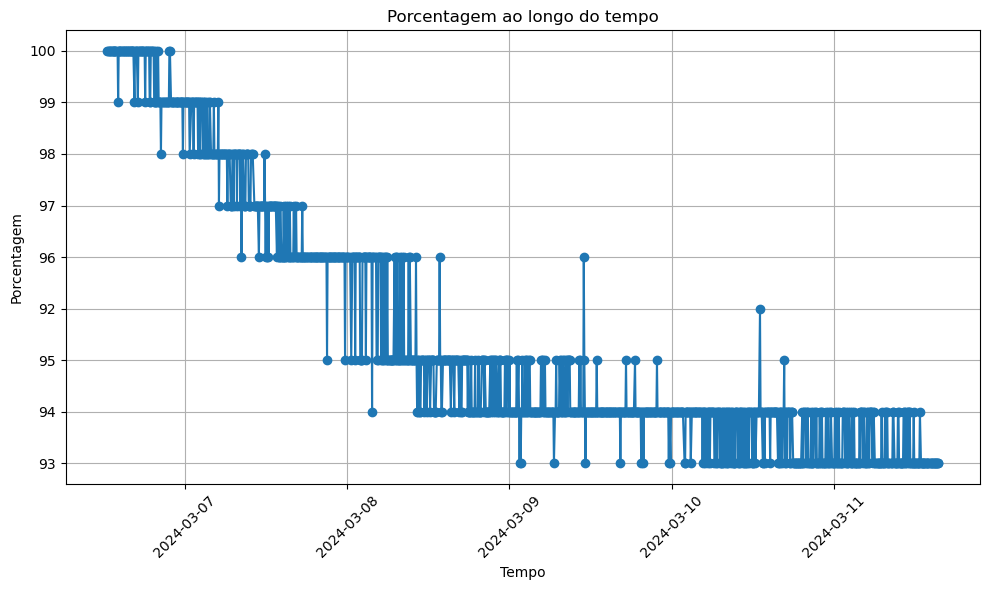

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

# Remover o cabeçalho da lista de timestamps
timestamps = timestamps[1:]
porcentagens = porcentagens[1:]

# Converter os timestamps para objetos datetime
timestamps_datetime = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S') for ts in timestamps]

# Inverter a ordem dos timestamps e porcentagens
timestamps_datetime.reverse()
porcentagens.reverse()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(timestamps_datetime, porcentagens, marker='o')
plt.title('Porcentagem ao longo do tempo')
plt.xlabel('Tempo')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



printar com horas percorridas

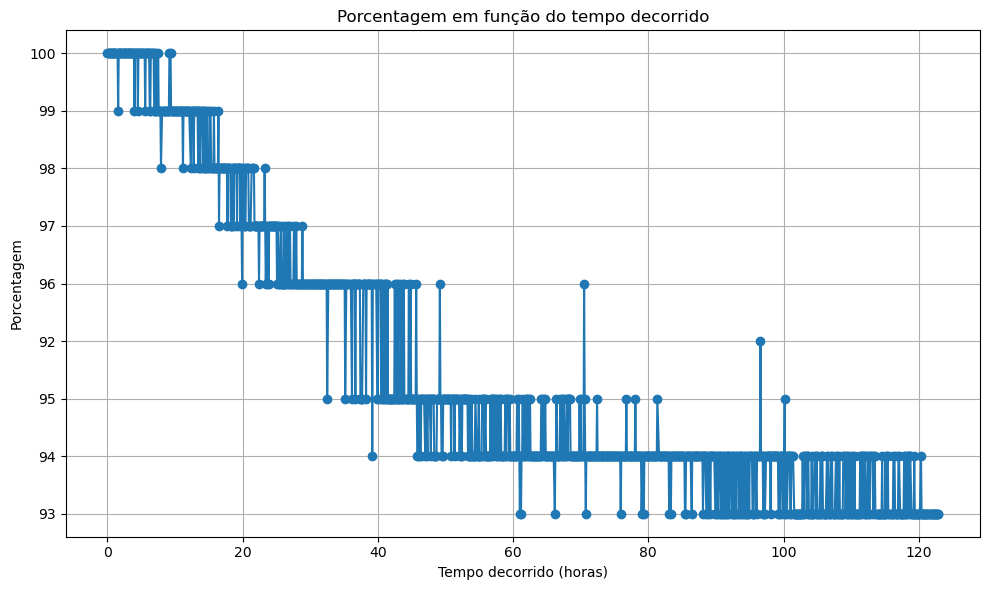

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime

# Remover o cabeçalho da lista de timestamps
timestamps = timestamps[1:]
porcentagens = porcentagens[1:]

# Converter os timestamps para objetos datetime
timestamps_datetime = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S') for ts in timestamps]

# Calcular o tempo decorrido em horas desde o primeiro ponto
tempo_inicial = timestamps_datetime[0]
tempos_decorridos = [(ts - tempo_inicial).total_seconds() / 3600 for ts in timestamps_datetime]

# Inverter a ordem dos tempos decorridos para que o tempo aumente da esquerda para a direita
tempos_decorridos = tempos_decorridos[::-1]

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempos_decorridos, porcentagens, marker='o')
plt.title('Porcentagem em função do tempo decorrido')
plt.xlabel('Tempo decorrido (horas)')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.tight_layout()
plt.show()


Media

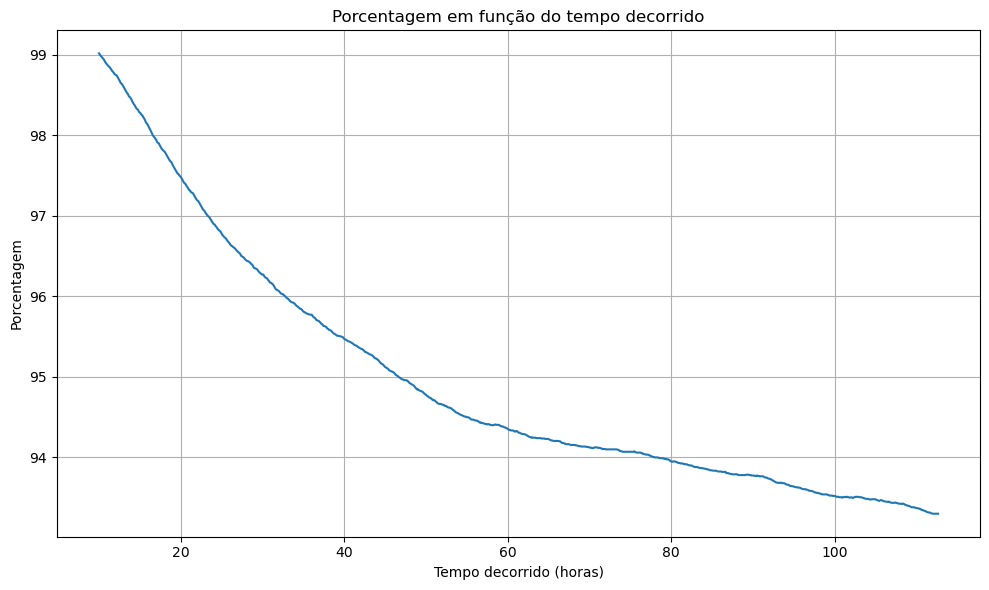

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Remover o cabeçalho da lista de timestamps
timestamps = timestamps[1:]
porcentagens = porcentagens[1:]

# Converter os timestamps para objetos datetime
timestamps_datetime = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S') for ts in timestamps]

# Calcular o tempo decorrido em horas desde o primeiro ponto
tempo_inicial = timestamps_datetime[0]
tempos_decorridos = [(ts - tempo_inicial).total_seconds() / 3600 for ts in timestamps_datetime]

# Inverter a ordem dos tempos decorridos para que o tempo aumente da esquerda para a direita
tempos_decorridos = tempos_decorridos[::-1]

# Converter as listas em arrays do NumPy
porcentagens = np.array(porcentagens, dtype=float)
tempos_decorridos = np.array(tempos_decorridos)

# Definir o tamanho da janela do filtro de média
window_size = 200

# Calcular a média móvel
porcentagens_suave = np.convolve(porcentagens, np.ones(window_size)/window_size, mode='valid')
tempos_decorridos_suave = tempos_decorridos[(window_size-1)//2:-(window_size-1)//2]

# Plotar o gráfico suave
plt.figure(figsize=(10, 6))
plt.plot(tempos_decorridos_suave, porcentagens_suave)
plt.title('Porcentagem em função do tempo decorrido')
plt.xlabel('Tempo decorrido (horas)')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.tight_layout()
plt.show()


prever fim

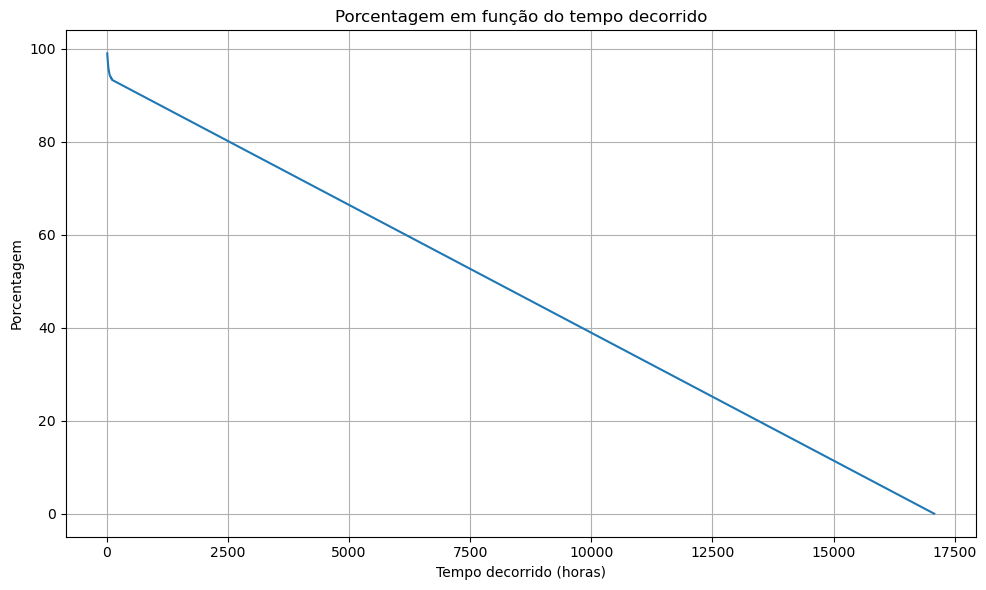

Tempo previsto para atingir 0%: 17076.88 horas


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tenha os arrays 'tempos_decorridos_suave' e 'porcentagens_suave' disponíveis

# Inverter a ordem dos valores
tempos_decorridos_suave = tempos_decorridos_suave[::-1]
porcentagens_suave = porcentagens_suave[::-1]

# Encontrar o tempo previsto para atingir 0%
tempo_para_zero = tempos_decorridos_suave[-1] - (porcentagens_suave[-1] / np.mean(np.diff(porcentagens_suave)))

# Estender a curva suavizada até atingir 0%
tempos_estendidos = np.append(tempos_decorridos_suave, tempo_para_zero)
porcentagens_estendidas = np.append(porcentagens_suave, 0)

# Plotar o gráfico suave estendido
plt.figure(figsize=(10, 6))
plt.plot(tempos_estendidos, porcentagens_estendidas)
plt.title('Porcentagem em função do tempo decorrido')
plt.xlabel('Tempo decorrido (horas)')
plt.ylabel('Porcentagem')
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir o tempo previsto para atingir 0%
print(f"Tempo previsto para atingir 0%: {tempo_para_zero:.2f} horas")


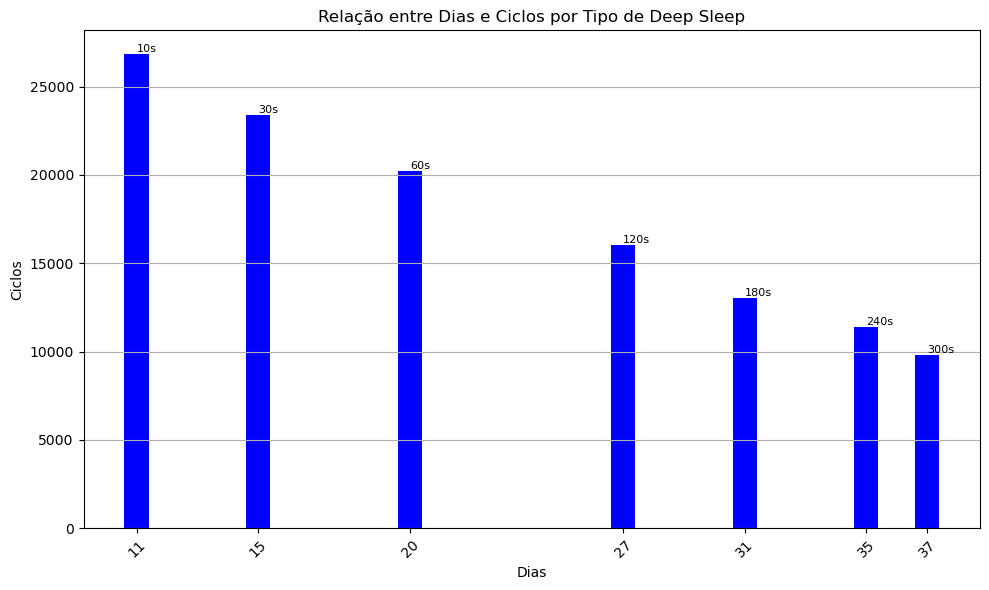

In [7]:
import matplotlib.pyplot as plt

# Dados
deepsleep = ['10s', '30s', '60s', '120s', '180s', '240s', '300s']
dias = [11, 15, 20, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 16044, 13039, 11394, 9824]

# Plot
plt.figure(figsize=(10, 6))

# Plot de barras verticais para dias e ciclos
plt.bar(dias, ciclos, color='blue', width=0.8)

# Adicionando rótulos e título
plt.title('Relação entre Dias e Ciclos por Tipo de Deep Sleep')
plt.xlabel('Dias')
plt.ylabel('Ciclos')
plt.xticks(dias, rotation=45)
plt.grid(axis='y')

# Adicionando rótulos aos pontos de dispersão
for i in range(len(deepsleep)):
    plt.text(dias[i], ciclos[i], deepsleep[i], fontsize=8, ha='left', va='bottom')

plt.tight_layout()
plt.show()


Interpolação

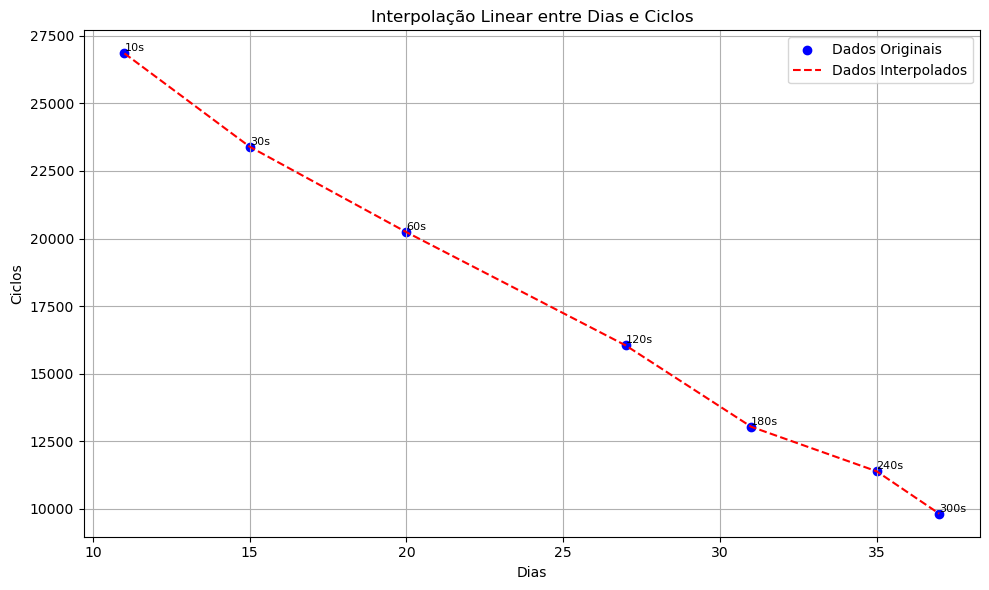

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Dados originais
dias_originais = np.array([11, 15, 20, 27, 31, 35, 37])
ciclos_originais = np.array([26847, 23393, 20234, 16044, 13039, 11394, 9824])

# Criando dias intermediários
dias_intermediarios = np.arange(11, 38)

# Interpolando os ciclos
ciclos_interpolados = np.interp(dias_intermediarios, dias_originais, ciclos_originais)

# Plot
plt.figure(figsize=(10, 6))

# Plot dos dados originais
plt.scatter(dias_originais, ciclos_originais, c='blue', marker='o', label='Dados Originais')

# Plot dos dados interpolados
plt.plot(dias_intermediarios, ciclos_interpolados, c='red', linestyle='--', label='Dados Interpolados')

# Adicionando rótulos e título
for i in range(len(deepsleep)):
    plt.text(dias[i], ciclos[i], deepsleep[i], fontsize=8, ha='left', va='bottom')

plt.title('Interpolação Linear entre Dias e Ciclos')
plt.xlabel('Dias')
plt.ylabel('Ciclos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Grafico de montanha

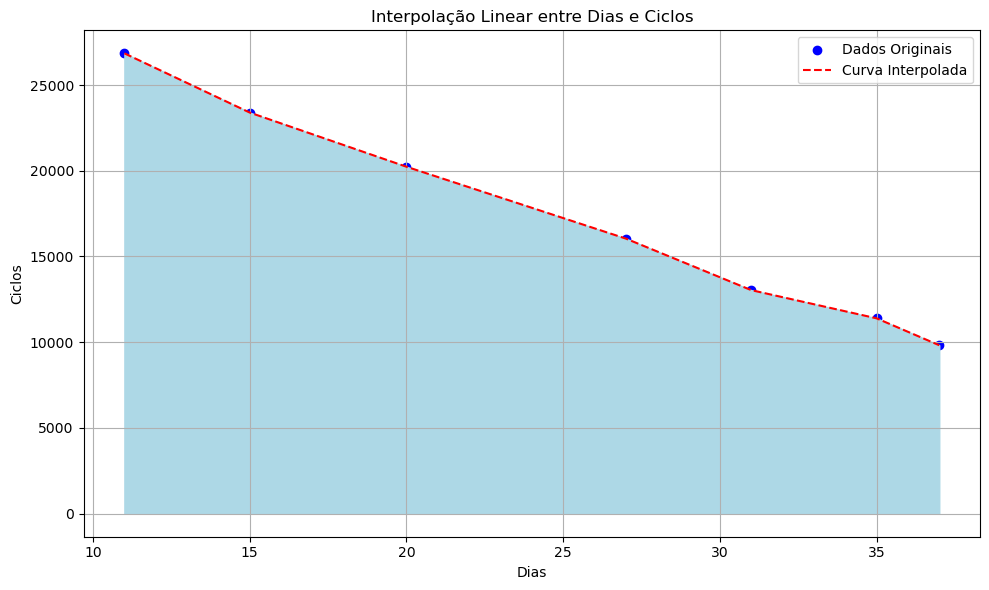

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Dados originais
dias_originais = np.array([11, 15, 20, 27, 31, 35, 37])
ciclos_originais = np.array([26847, 23393, 20234, 16044, 13039, 11394, 9824])

# Criando dias intermediários
dias_intermediarios = np.arange(11, 38)

# Interpolando os ciclos
ciclos_interpolados = np.interp(dias_intermediarios, dias_originais, ciclos_originais)

# Plot
plt.figure(figsize=(10, 6))

# Plot dos dados originais
plt.scatter(dias_originais, ciclos_originais, c='blue', marker='o', label='Dados Originais')

# Plot da curva interpolada
plt.plot(dias_intermediarios, ciclos_interpolados, c='red', linestyle='--', label='Curva Interpolada')

# Preenchimento da área abaixo da curva interpolada
plt.fill_between(dias_intermediarios, ciclos_interpolados, color='lightblue')

# Adicionando rótulos e título
plt.title('Interpolação Linear entre Dias e Ciclos')
plt.xlabel('Dias')
plt.ylabel('Ciclos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


3d grafico

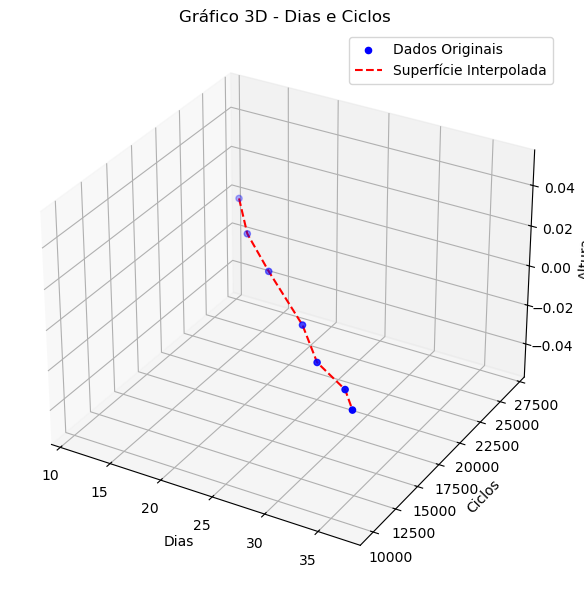

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Dados originais
dias_originais = np.array([11, 15, 20, 27, 31, 35, 37])
ciclos_originais = np.array([26847, 23393, 20234, 16044, 13039, 11394, 9824])

# Criando uma grade para os dias e ciclos interpolados
dias_interpolados = np.linspace(min(dias_originais), max(dias_originais), 100)
ciclos_interpolados = np.interp(dias_interpolados, dias_originais, ciclos_originais)

# Configurando a figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot dos pontos originais
ax.scatter(dias_originais, ciclos_originais, zs=0, c='blue', marker='o', label='Dados Originais')

# Plot da superfície interpolada
ax.plot(dias_interpolados, ciclos_interpolados, zs=0, c='red', linestyle='--', label='Superfície Interpolada')

# Adicionando rótulos e título
ax.set_xlabel('Dias')
ax.set_ylabel('Ciclos')
ax.set_zlabel('Altura')
ax.set_title('Gráfico 3D - Dias e Ciclos')

# Adicionando uma grade
ax.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


add bateria


C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\1713641358.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


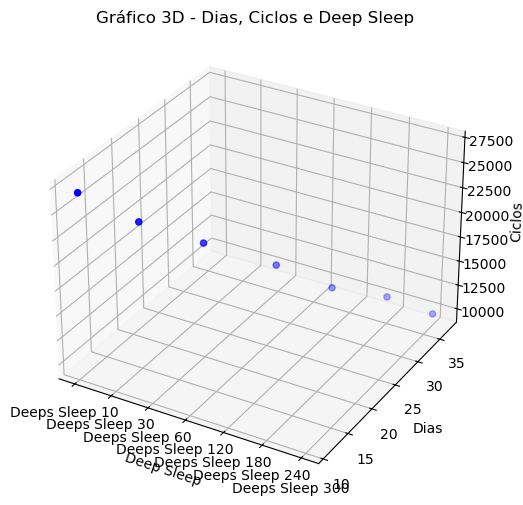

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = range(len(deepsleep))

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot dos dados
ax.scatter(deepsleep_values, dias, ciclos, c='b', marker='o')

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep)
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')

plt.tight_layout()
plt.show()


mais legivel

C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\1582933424.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


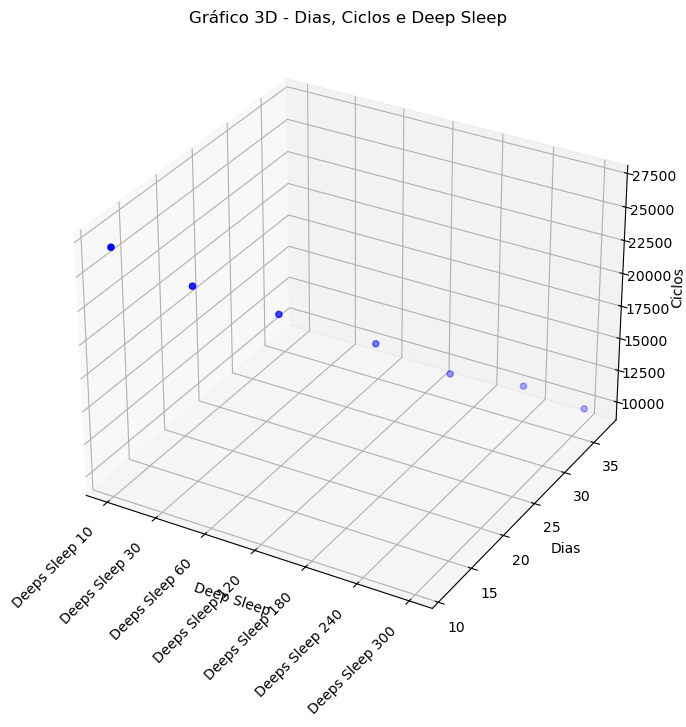

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = range(len(deepsleep))

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot dos dados
ax.scatter(deepsleep_values, dias, ciclos, c='b', marker='o')

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep, rotation=45, ha='right')
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\1918968911.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


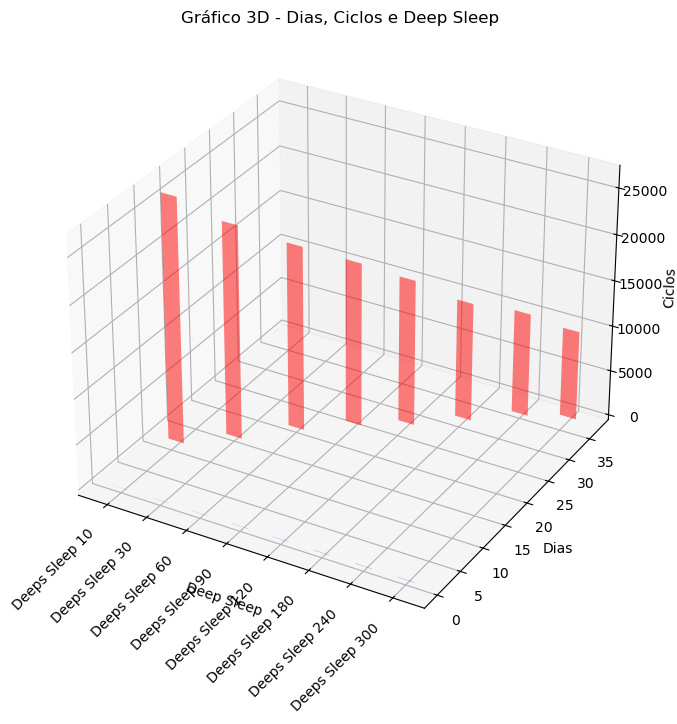

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = np.arange(len(deepsleep))

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot das barras 3D para os dias
ax.bar(deepsleep_values, dias, zs=0, zdir='y', color='b', alpha=0.5, width=0.4)

# Plot das barras 3D para os ciclos
ax.bar(deepsleep_values, ciclos, zs=dias, zdir='y', color='r', alpha=0.5, width=0.4)

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep, rotation=45, ha='right')
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\3574249233.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


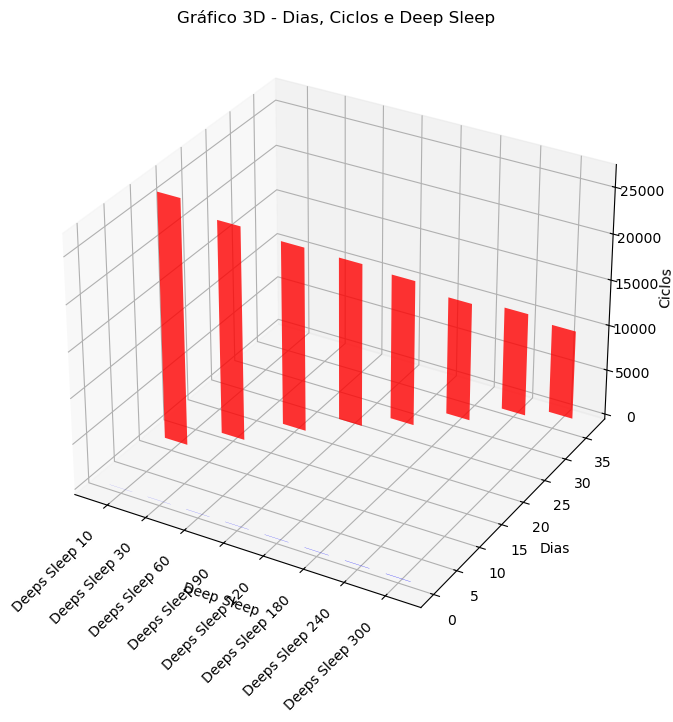

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = np.arange(len(deepsleep))

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot das barras 3D para os dias
ax.bar(deepsleep_values, dias, zs=0, zdir='y', color='b', alpha=0.8, width=0.6)

# Plot das barras 3D para os ciclos
ax.bar(deepsleep_values, ciclos, zs=dias, zdir='y', color='r', alpha=0.8, width=0.6)

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep, rotation=45, ha='right')
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\2595457933.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


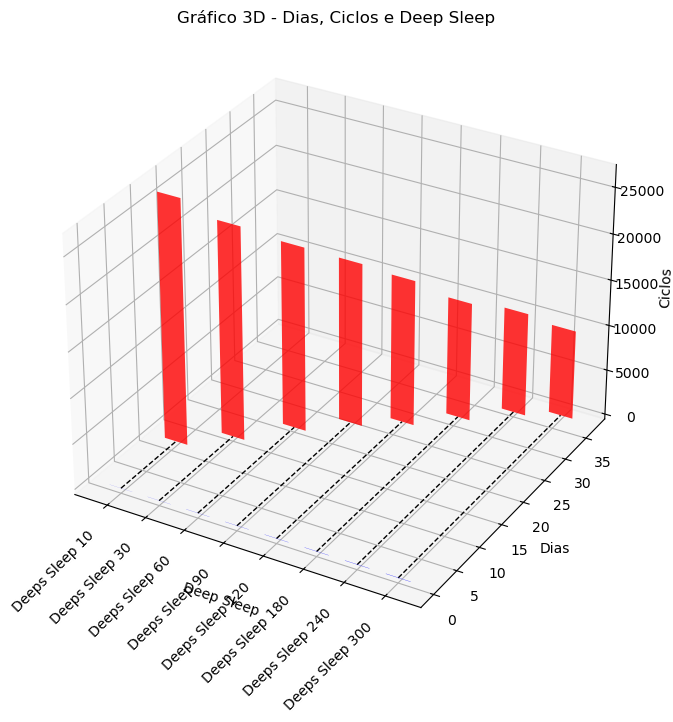

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = np.arange(len(deepsleep))

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot das barras 3D para os dias
bar1 = ax.bar(deepsleep_values, dias, zs=0, zdir='y', color='b', alpha=0.8, width=0.6)

# Adicionando linhas verticais para destacar os valores de "Dias"
for i in range(len(deepsleep_values)):
    ax.plot([deepsleep_values[i], deepsleep_values[i]], [0, dias[i]], [0, 0], color='black', linestyle='--', linewidth=1)

# Plot das barras 3D para os ciclos
bar2 = ax.bar(deepsleep_values, ciclos, zs=dias, zdir='y', color='r', alpha=0.8, width=0.6)

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep, rotation=45, ha='right')
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')
ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Mateus\AppData\Local\Temp\ipykernel_19368\921841268.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


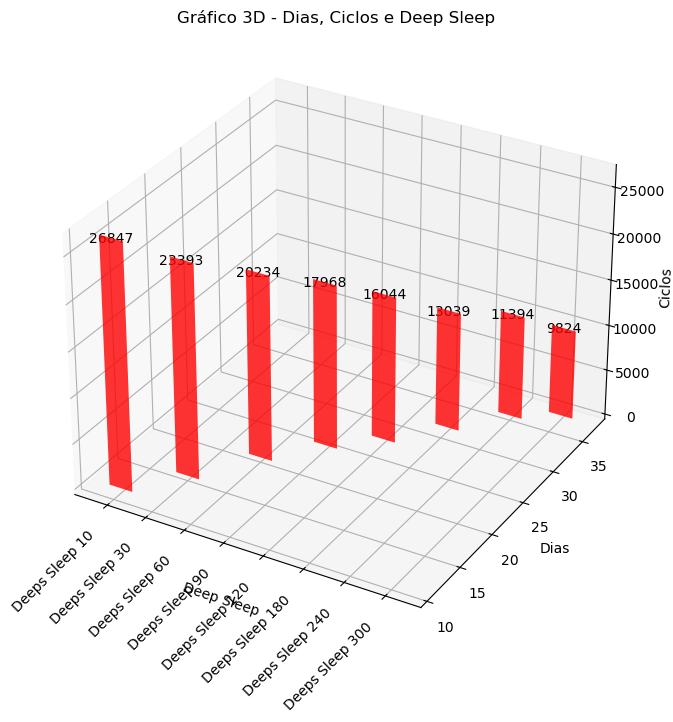

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = np.arange(len(deepsleep))

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot das barras 3D para os ciclos
bar2 = ax.bar(deepsleep_values, ciclos, zs=dias, zdir='y', color='r', alpha=0.8, width=0.6)

# Adicionando legendas para cada barra de ciclos
for i in range(len(deepsleep_values)):
    ax.text(deepsleep_values[i], dias[i], ciclos[i], f'{ciclos[i]}', ha='center', va='center', color='black', fontsize=10, zorder=2)

# Configurações adicionais
ax.set_xticks(deepsleep_values)
ax.set_xticklabels(deepsleep, rotation=45, ha='right')
ax.set_xlabel('Deep Sleep')
ax.set_ylabel('Dias')
ax.set_zlabel('Ciclos')
ax.set_title('Gráfico 3D - Dias, Ciclos e Deep Sleep')
ax.grid(True)

plt.tight_layout()
plt.show()


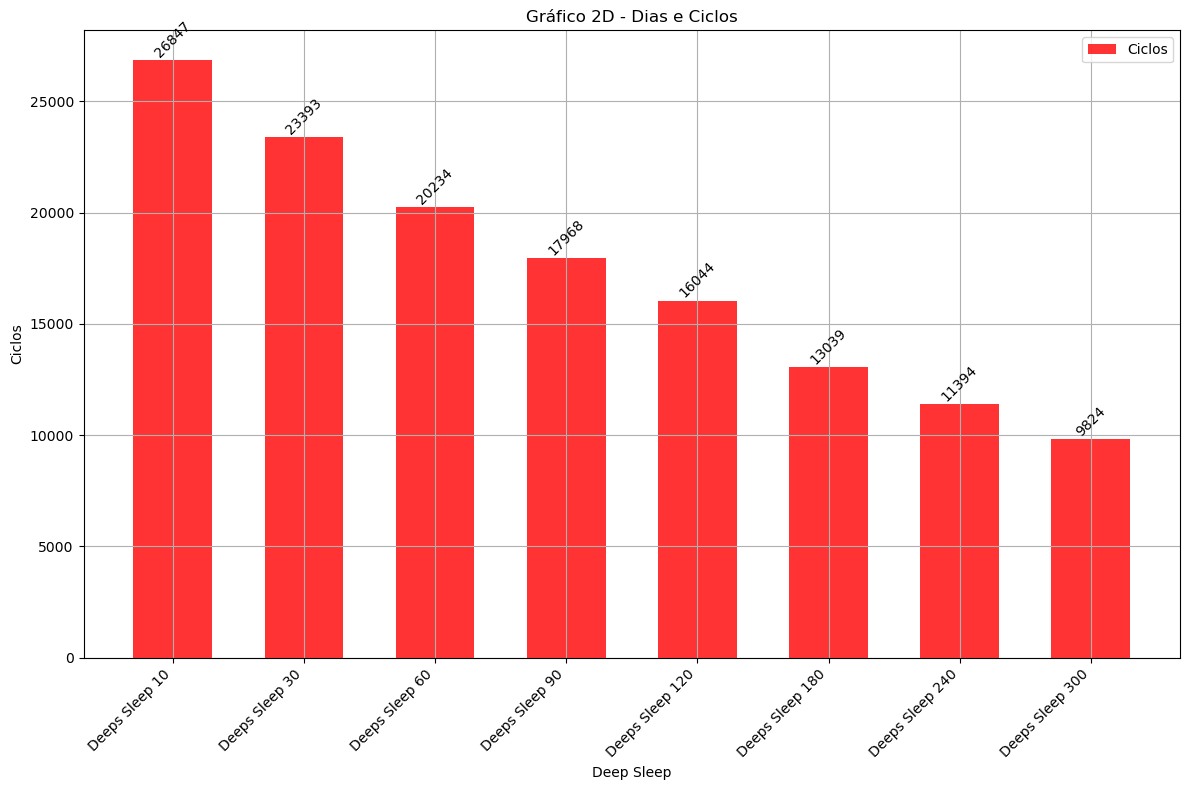

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Convertendo os nomes de Deep Sleep para valores numéricos
deepsleep_values = np.arange(len(deepsleep))

# Plot
plt.figure(figsize=(12, 8))

# Plot das barras para os ciclos
plt.bar(deepsleep_values, ciclos, color='r', alpha=0.8, width=0.6, label='Ciclos')

# Adicionando legendas para cada barra de ciclos
for i in range(len(deepsleep_values)):
    plt.text(deepsleep_values[i], ciclos[i], f'{ciclos[i]}', ha='center', va='bottom', color='black', fontsize=10, rotation=45)

# Configurações adicionais
plt.xticks(deepsleep_values, deepsleep, rotation=45, ha='right')
plt.xlabel('Deep Sleep')
plt.ylabel('Ciclos')
plt.title('Gráfico 2D - Dias e Ciclos')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


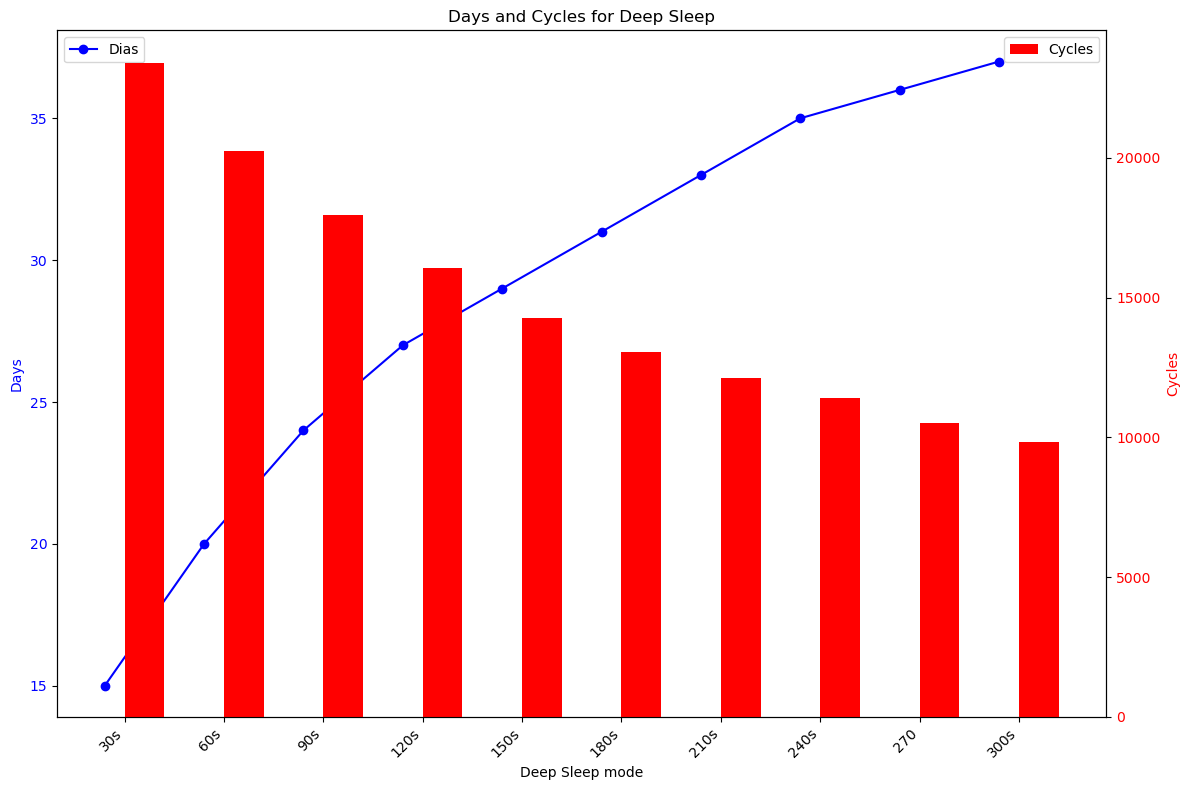

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
deepsleep = ['30s', '60s', '90s','120s', '150s','180s', '210s','240s', '270','300s']
dias = [15, 20, 24, 27, 29, 31, 33, 35, 36, 37]
ciclos = [23393, 20234, 17968, 16044, 14285, 13039, 12112, 11394, 10529, 9824]

# Ajustando a largura das barras
bar_width = 0.40

# Posição das barras no eixo x
x = np.arange(len(deepsleep))

# Plot

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot das barras para os dias (eixo vertical esquerdo)
# Plot das linhas para os dias (eixo vertical esquerdo)
ax1.plot(x, dias, color='b', marker='o', label='Dias')
ax1.set_ylabel('Days', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Criando um eixo secundário para os ciclos (eixo vertical direito)
ax2 = ax1.twinx()
ax2.bar(x + bar_width, ciclos, color='r', width=bar_width, label='Cycles')
ax2.set_ylabel('Cycles', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Configurações adicionais
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(deepsleep, rotation=45, ha='right')
ax1.set_xlabel('Deep Sleep mode')
ax1.set_title('Days and Cycles for Deep Sleep')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


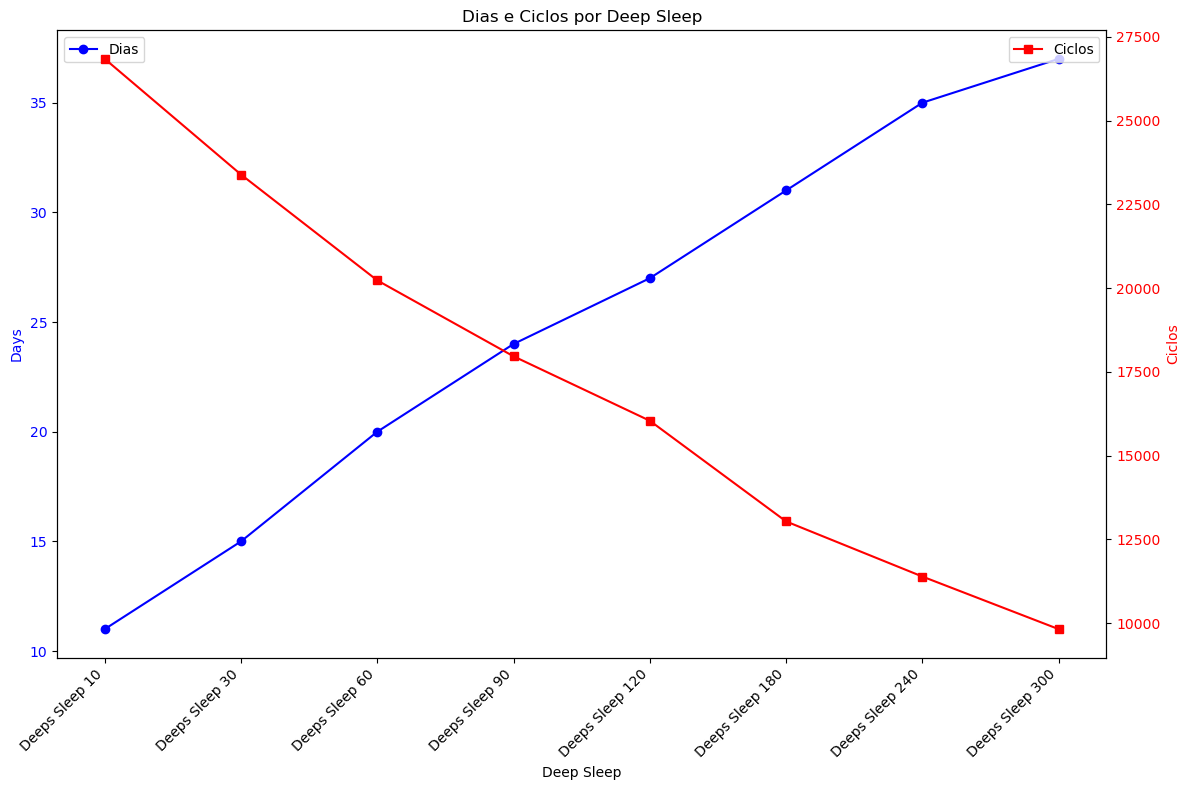

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
deepsleep = ['Deeps Sleep 10', 'Deeps Sleep 30', 'Deeps Sleep 60', 'Deeps Sleep 90','Deeps Sleep 120', 'Deeps Sleep 180', 'Deeps Sleep 240', 'Deeps Sleep 300']
dias = [11, 15, 20, 24, 27, 31, 35, 37]
ciclos = [26847, 23393, 20234, 17968, 16044, 13039, 11394, 9824]

# Ajustando a largura das barras
bar_width = 0.35

# Posição das barras no eixo x
x = np.arange(len(deepsleep))

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot das linhas para os dias (eixo vertical esquerdo)
ax1.plot(x, dias, color='b', marker='o', label='Dias')
ax1.set_ylabel('Days', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Criando um eixo secundário para os ciclos (eixo vertical direito)
ax2 = ax1.twinx()
ax2.plot(x, ciclos, color='r', marker='s', label='Ciclos')
ax2.set_ylabel('Ciclos', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Configurações adicionais
ax1.set_xticks(x)
ax1.set_xticklabels(deepsleep, rotation=45, ha='right')
ax1.set_xlabel('Deep Sleep')
ax1.set_title('Dias e Ciclos por Deep Sleep')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


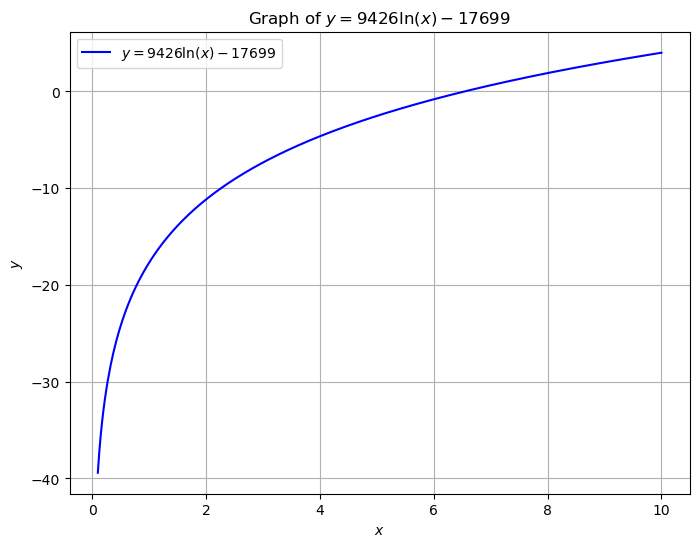

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 9.426 * np.log(x) - 17.699

# Generate x values
x_values = np.linspace(0.1, 10, 400)  # Avoid x = 0 for logarithmic function

# Calculate corresponding y values
y_values = f(x_values)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$y = 9426 \ln(x) - 17699$', color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Graph of $y = 9426 \ln(x) - 17699$')
plt.grid(True)
plt.legend()
plt.show()


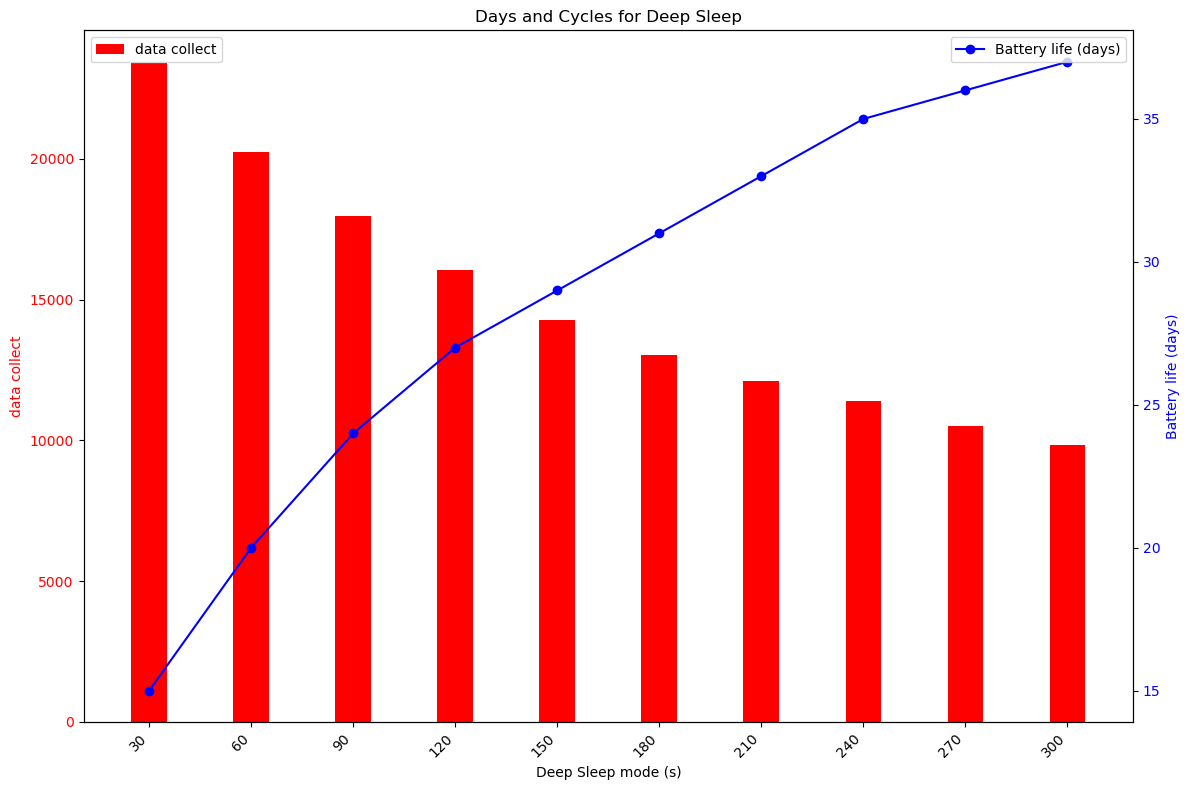

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
deepsleep = ['30', '60', '90','120', '150','180', '210','240', '270','300']
dias = [15, 20, 24, 27, 29, 31, 33, 35, 36, 37]
ciclos = [23393, 20234, 17968, 16044, 14285, 13039, 12112, 11394, 10529, 9824]

# Ajustando a largura das barras
bar_width = 0.35

# Posição das barras no eixo x
x = np.arange(len(deepsleep))

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot das barras para os ciclos (eixo vertical direito)
ax1.bar(x, ciclos, color='r', width=bar_width, label='data collect')

# Configurações da linha para os dias (eixo vertical esquerdo)
ax2 = ax1.twinx()
ax2.plot(x, dias, color='b', marker='o', label='Battery life (days)')

# Configurações adicionais
ax1.set_ylabel('data collect', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2.set_ylabel('Battery life (days)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.set_xticks(x)
ax1.set_xticklabels(deepsleep, rotation=45, ha='right')
ax1.set_xlabel('Deep Sleep mode (s)')
ax1.set_title('Days and Cycles for Deep Sleep')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
